Gradient Descent
    define variables

In [12]:
from typing import List
Vector = List[float]
def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w)
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_square(v: Vector) -> float:
    return dot(v, v)

Differentiate

In [31]:
from typing import Callable
def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

Calculate the solution of differentiate

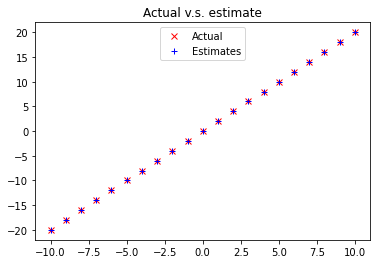

In [32]:
def square(x: float) -> float:
    return x * x
def derivative(x: float) -> float:
    return 2 * x

xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

import matplotlib.pyplot as plt
plt.title('Actual v.s. estimate')
plt.plot(xs, actuals, 'rx', label = 'Actual')
plt.plot(xs, estimates, 'b+', label = 'Estimates')
plt.legend(loc = 9)
plt.show()




In [34]:
def partial_difference_quotient(f: Callable[[Vector], float], v: Vector, i: int, h: float) -> float:
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float], v: Vector, h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]


Working with data

uniform
 None
normal
 None


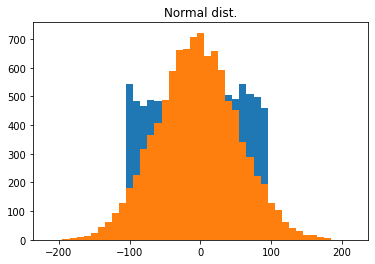

In [6]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    return bucket_size * math.floor(point / bucket_size) ## floor denotes to 無條件捨去 ## 以floor 的方式取整數，以作為 bucket size 的倍數

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    return Counter(bucketize(point, bucket_size) for point in points) ## 針對資料點進行分組，並計算每個分組有幾個資料點

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width = bucket_size)
    plt.title(title)

## Loading data
import random
import numpy as np
random.seed(0)

uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = [57 * np.random.randn() for _ in range(10000)]
print(f'uniform\n', plot_histogram(uniform, 10, 'Unifrom dist.'))
print(f'normal\n', plot_histogram(normal, 10, 'Normal dist.'))

tqdm

In [9]:
import tqdm
for i in tqdm.tqdm(range(100)):
    _ = [random.random for i in range(1000000)]

100%|██████████| 100/100 [00:04<00:00, 24.49it/s]
